<a href="https://colab.research.google.com/github/Sbcyadav9621/Adventure-works-report-sales-/blob/main/PyTorch_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mssmartypants/rice-type-classification')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandebhuvanachandra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 640MB/s]

In [4]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Importing data

In [5]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


# Exploratory data analysis

In [8]:
data_df.isna().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


In [9]:
data_df.duplicated().sum()

np.int64(0)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


# Dropping "id" column from data

In [12]:
data_df.drop('id',axis=1,inplace=True)

In [13]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [14]:
data_df.shape

(18185, 11)

In [15]:
data_df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [16]:
data_df.Class.unique()

array([1, 0])

In [17]:
data_df.Class.value_counts()

,count
Class,
1,9985
0,8200


In [18]:
original_df = data_df.copy()

# Feature Scalling:
We divide each feature with its maximum feature column value. Why becaue each column contains different ranges.
- If we dont do Feature scalling, Model will give more focus on large-magnitude features.
- Fair comparison between features
- Faster convergence during training period
- Better performance.

In [20]:
for column in data_df.columns: # Removed the parentheses here
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


# Seperate feature matrix and target value

In [21]:
X = np.array(data_df.iloc[:,:-1])
Y = np.array(data_df.iloc[:,-1])

In [59]:
print(X.shape)
print(X.shape[1])
print(X.shape[0])

(18185, 10)
10
18185


# split the data into training and testing sets and validation sets

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)


In [23]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(12729, 10) (12729,)
(2728, 10) (2728,)
(2728, 10) (2728,)


In [24]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


# Creating a Dataset which transforms data into tensors

In [28]:
class dataset(Dataset):
  def __init__(self,X,Y):
    self.X = torch.tensor(X,dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y,dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self,index):
    return self.X[index], self.Y[index]

In [29]:
training_data = dataset(X_train,y_train)
validation_data = dataset(X_val,y_val)
testing_data = dataset(X_test,y_test)

# Creating Dataloader

In [31]:
train_dataloader = DataLoader(training_data,batch_size=8,shuffle =True)
validation_dataloader = DataLoader(validation_data,batch_size=8,shuffle=True)
testing_dataloader = DataLoader(testing_data,batch_size=8,shuffle=True)

In [35]:
# Print first batch from trian_dataloader which has 8 records including X and y
for x,y in train_dataloader:
  print(x)
  print('-------')
  print(y)
  break

tensor([[0.7516, 0.8229, 0.7963, 0.9309, 0.7151, 0.8670, 0.6607, 0.6982, 0.8456,
         0.5863],
        [0.6169, 0.8209, 0.6568, 0.9648, 0.5869, 0.7855, 0.7752, 0.6631, 0.7696,
         0.7091],
        [0.6273, 0.6961, 0.7850, 0.8909, 0.5966, 0.7920, 0.6876, 0.6215, 0.8907,
         0.5030],
        [0.4348, 0.7151, 0.5289, 0.9752, 0.4130, 0.6594, 0.6513, 0.5718, 0.7293,
         0.7671],
        [0.8335, 0.8518, 0.8554, 0.9224, 0.8007, 0.9130, 0.7224, 0.7396, 0.8357,
         0.5650],
        [0.5596, 0.7317, 0.6643, 0.9439, 0.5298, 0.7481, 0.8138, 0.6112, 0.8217,
         0.6249],
        [0.6014, 0.8681, 0.6012, 0.9827, 0.5687, 0.7755, 0.9060, 0.6865, 0.6999,
         0.8192],
        [0.6729, 0.7700, 0.7619, 0.9259, 0.6342, 0.8203, 0.6549, 0.6612, 0.8441,
         0.5734]], device='cuda:0')
-------
tensor([0., 1., 0., 1., 0., 0., 1., 0.], device='cuda:0')


In [36]:
HIDDEN_UNITS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()

    self.input_layer = nn.Linear(in_features = X.shape[1],out_features = 10)
    self.linear = nn.Linear(in_features = HIDDEN_UNITS,out_features=1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [37]:
model = MyModel().to(device)

In [39]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [40]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr=0.001)

# Training loop

In [47]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs,labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = (prediction.round() == labels).sum().item()

    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    for data in validation_dataloader:
      inputs,labels = data

      prediction = model(inputs).squeeze()

      batch_loss = criterion(prediction,labels)

      total_loss_val += batch_loss.item()
      acc = (prediction.round() == labels).sum().item()
      total_acc_val += acc
  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_val/1000,4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100,4))

  print(f'''Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000,4)} Train Acc: {round(total_acc_train/training_data.__len__() * 100,4)}
       validation Loss:{round(total_loss_val/1000, 4)} Validation Acc: {round(total_acc_val/validation_data.__len__() * 100,4)}''')

Epoch no. 1 Train Loss: 0.0648 Train Acc: 98.633
       validation Loss:0.0163 Validation Acc: 98.4971
Epoch no. 2 Train Loss: 0.0653 Train Acc: 98.5781
       validation Loss:0.0136 Validation Acc: 98.9003
Epoch no. 3 Train Loss: 0.0639 Train Acc: 98.5938
       validation Loss:0.0136 Validation Acc: 98.827
Epoch no. 4 Train Loss: 0.065 Train Acc: 98.5781
       validation Loss:0.0136 Validation Acc: 98.827
Epoch no. 5 Train Loss: 0.0648 Train Acc: 98.5073
       validation Loss:0.0137 Validation Acc: 98.7903
Epoch no. 6 Train Loss: 0.0645 Train Acc: 98.5702
       validation Loss:0.0139 Validation Acc: 98.7537
Epoch no. 7 Train Loss: 0.0644 Train Acc: 98.5231
       validation Loss:0.0136 Validation Acc: 98.9003
Epoch no. 8 Train Loss: 0.065 Train Acc: 98.6566
       validation Loss:0.0136 Validation Acc: 98.8636
Epoch no. 9 Train Loss: 0.0652 Train Acc: 98.5781
       validation Loss:0.0137 Validation Acc: 98.7903
Epoch no. 10 Train Loss: 0.0649 Train Acc: 98.5388
       validation 

In [49]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs,label = data

    prediction = model(inputs).squeeze()

    batch_loss = criterion(prediction,label)

    total_loss_test += batch_loss.item()

    total_acc_test += acc

print('Accuracy:',round(total_acc_test/testing_data.__len__() * 100,4))

Accuracy: 100.0


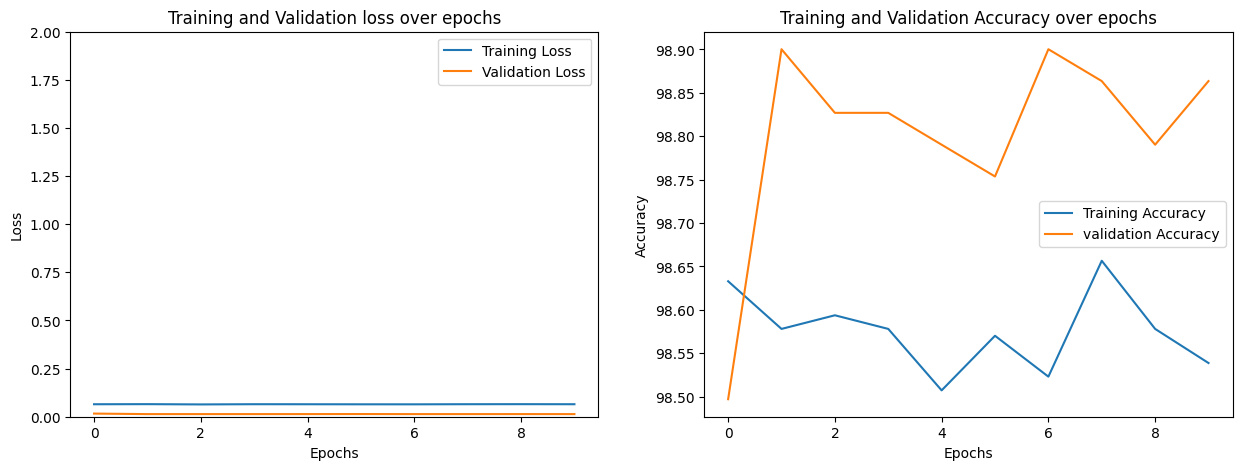

In [51]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

axs[0].plot(total_loss_train_plot,label = 'Training Loss')
axs[0].plot(total_loss_validation_plot,label = 'Validation Loss')
axs[0].set_title('Training and Validation loss over epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot,label = 'Training Accuracy')
axs[1].plot(total_acc_validation_plot,label='validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim
axs[1].legend()

plt.show()

In [54]:
area = 2353/original_df['Area'].abs().max()
MajorAxisLength = 81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/original_df['MinorAxisLength'].abs().max()
Eccentricity = 32/original_df['Eccentricity'].abs().max()
ConvexArea = 12/original_df['ConvexArea'].abs().max()
EquivDiameter = 32/original_df['EquivDiameter'].abs().max()
Extent = 98/original_df['Extent'].abs().max()
Perimeter = 927/original_df['Perimeter'].abs().max()
Roundness = 677/original_df['Roundness'].abs().max()
AspectRation = 24/original_df['AspectRation'].abs().max()

# Create a list of the scaled values and pass it to torch.tensor()
my_prediction = model(torch.tensor([area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation],dtype = torch.float32).to(device))
print(my_prediction.item())

0.0


In [57]:
round(my_prediction.item())

0